In [213]:
import numpy as np
import matplotlib.pyplot as plt

In [214]:
plt.style.use('dark_background')
plt.rcParams['figure.figsize'] = (10,8)

#Criar o dataset

In [215]:
# Função para criar o dataset
def get_linear_curve(x, w, b=0, noise_scale=0):
    return w * x + b + noise_scale * np.random.randn(x.shape[0])

In [216]:
x = np.arange(-10, 30.1, 0.5)
Y = get_linear_curve(x, 1.8, 32, noise_scale=2.5)

In [218]:
x.shape, Y.shape

((81,), (81,))

Text(0, 0.5, '°F')

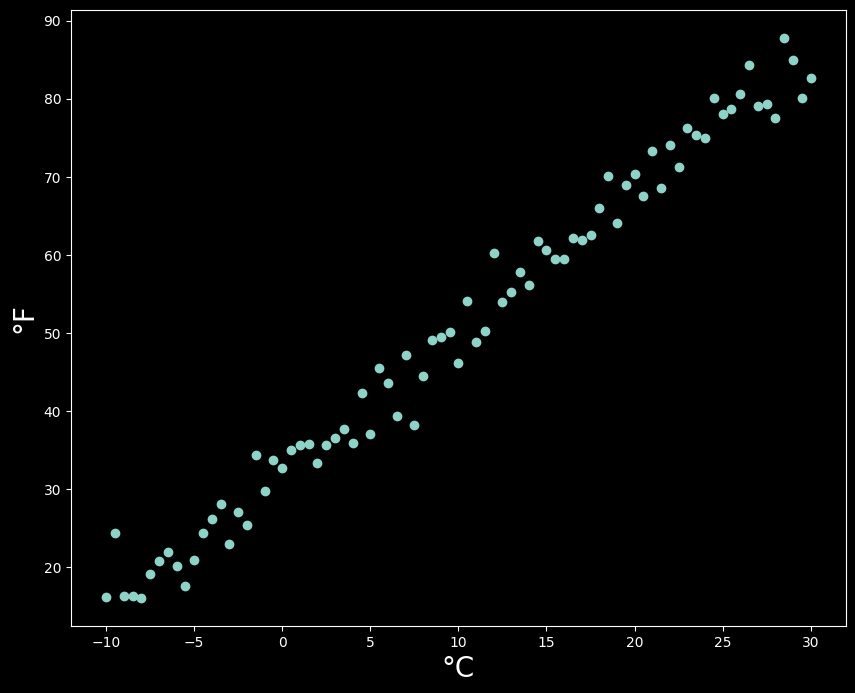

In [219]:
plt.scatter(x, Y)
plt.xlabel('°C', fontsize=20)
plt.ylabel('°F', fontsize=20)

#Modelo

- Iniciarlizar os pesos e bias
- Feedforward
- Calcular a perda
- Backpropagtion





In [221]:
# Inicializar pesos e bias
w = np.random.randn(1)
b = 0

In [222]:
# Função de ativação para categorizar a temperatura
def activation(y):
    conditions = [
        (y < 50, "Frio"),
        (y >= 50 and y <= 80.6, "Agradável"),
        (y > 80.6, "Calor")
    ]
    for condition, label in conditions:
        if condition:
            return label
    return "Indefinido"

In [223]:
# Feedforward (predição com ativação)
def forward(inputs, w, b):
    linear_output = inputs * w + b
    return np.array([activation(y) for y in linear_output]), linear_output

In [224]:
# Função para calcular o erro (MSE)
def mse(Y, y):
    return np.mean((Y - y) ** 2)

In [225]:
# Backpropagation (ajuste dos pesos e bias)
def backpropagation(inputs, outputs, targets, w, b, learning_rate):
    dw = learning_rate * (-2 * inputs * (targets - outputs)).mean()
    db = learning_rate * (-2 * (targets - outputs)).mean()

    w -= dw
    b -= db
    return w, b

In [226]:
# Função para treinar o modelo
def model_fit(inputs, targets, w, b, learning_rate=0.001, epochs=200):
    for epoch in range(epochs):
        predicted_binary, linear_output = forward(inputs, w, b)  # Agora inclui a ativação e a saída linear
        loss = np.mean(mse(targets, linear_output))  # Cálculo da perda usando a saída linear (não binária)

        w, b = backpropagation(inputs, linear_output, targets, w, b, learning_rate)

        if (epoch + 1) % 50 == 0:
            print(f'Epoch: {epoch+1}, Loss: {loss:.4f}')
    return w, b


In [278]:
# Dataset
x = np.arange(-10, 31, 2)
Y = get_linear_curve(x, w=1.8, b=31, noise_scale=2)

In [279]:
# Inicialização dos parâmetros
w = np.random.randn(1)
b = np.zeros(1)

In [280]:
# Treinamento
w, b = model_fit(x, Y, w, b, learning_rate=0.001, epochs=200)
print(f'w: {w[0]:.3f}, b: {b[0]:.3f}')

Epoch: 50, Loss: 489.3930
Epoch: 100, Loss: 434.9021
Epoch: 150, Loss: 386.5147
Epoch: 200, Loss: 343.5471
w: 2.792, b: 6.525


In [281]:
# Predições com o modelo treinado
predicted_binary, linear_output = forward(x, w, b)

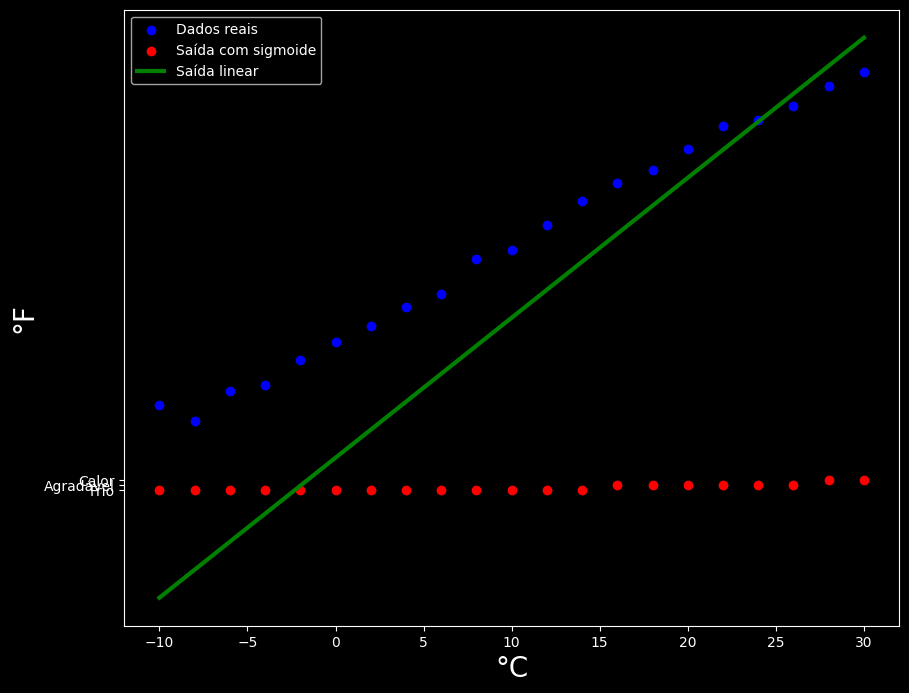

In [282]:
# Visualização
plt.scatter(x, Y, label="Dados reais", color='blue')
plt.scatter(x, predicted_binary, label="Saída com sigmoide", color='red')
plt.plot(x, linear_output, label="Saída linear", color='green', lw=3)
plt.xlabel('°C', fontsize=20)
plt.ylabel('°F', fontsize=20)
plt.legend()
plt.show()


In [283]:
# Exibindo os resultados binários
print("Saídas categorizadas:")
print(predicted_binary)

Saídas categorizadas:
['Frio' 'Frio' 'Frio' 'Frio' 'Frio' 'Frio' 'Frio' 'Frio' 'Frio' 'Frio'
 'Frio' 'Frio' 'Frio' 'Agradável' 'Agradável' 'Agradável' 'Agradável'
 'Agradável' 'Agradável' 'Calor' 'Calor']
